In [1]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from mdp import *
from utils import *

%matplotlib inline

np.random.seed(0)

In [2]:
gridmdp_small = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [35]:
pi_gmdps = best_policy(gridmdp_small, value_iteration(gridmdp_small, .01)[0])
#gridmdp_small.to_arrows(pi_gmdps)
#value_iteration(gridmdp_small, .01)

Text(0.5,0,'Discounting rate Gamma')

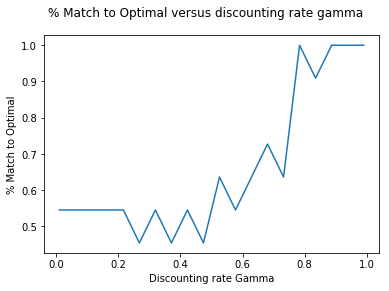

In [36]:
import difflib

gridlist = [[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]]
term = [(3, 2), (3, 1)]


#gridmdp_small = GridMDP(, gamma = 0.9)


def strat_match_pct(strat1, strat2, states):
    optimal = [strat1[state] for state in sorted(states)]
    suboptimal = [strat2[state] for state in sorted(states)]
    sm = difflib.SequenceMatcher(None,optimal,suboptimal)
    return sm.ratio()

dist_sm = []

for gamma in np.linspace(0.01,0.99,20):
    gridmdp = GridMDP(gridlist, terminals=term, gamma=gamma)
    vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
    vi_unconverged = best_policy(gridmdp, value_iteration(gridmdp, 1.0)[0])
    dist_sm.append(strat_match_pct(vi_converged, vi_unconverged, gridmdp.states))

plt.plot(np.linspace(0.01,0.99,20), dist_sm)

plt.suptitle("% Match to Optimal versus discounting rate gamma")
plt.ylabel("% Match to Optimal")
plt.xlabel("Discounting rate Gamma")

0.9090909090909091
0.5454545454545454
0.8181818181818182
0.5454545454545454
0.9090909090909091
0.7272727272727273
0.9090909090909091
0.7272727272727273
0.8181818181818182
0.7272727272727273
0.8181818181818182
0.7272727272727273
0.8181818181818182
0.7272727272727273
1.0
0.7272727272727273
1.0
0.7272727272727273
0.8181818181818182
0.7272727272727273
1.0
0.5454545454545454
1.0
0.8181818181818182
1.0
0.8181818181818182
1.0
0.8181818181818182
1.0
0.7272727272727273
1.0
0.9090909090909091
1.0
0.7272727272727273
1.0
0.8181818181818182
1.0
0.7272727272727273
1.0
0.7272727272727273
1.0
0.8181818181818182
1.0
0.9090909090909091
1.0
0.7272727272727273
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.8181818181818182
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.9090909090909091
1.0
0.

(0, 1)

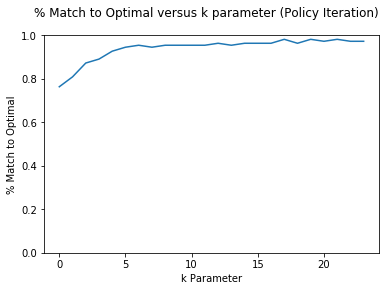

In [103]:
dist_lg = []

for k in range(1,25):
    k_list = []
    for x in range(10):
        gridmdp = GridMDP(gridlist, terminals=term, gamma=gamma)
        pi, U, pi_iter_time, deltas = policy_iteration(gridmdp, k=k)
        vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
        k_list.append(strat_match_pct(vi_converged, pi, gridmdp.states))
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


(0, 1)

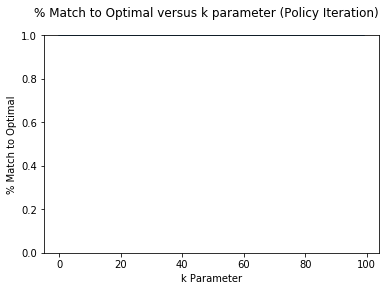

In [111]:
dist_lg = []

gridlist = [[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]]
term = [(3, 2), (3, 1)]

for ep in np.linspace(0.0,5.0,100):
    k_list = []
    for x in range(10):
        gridmdp = GridMDP(gridlist, terminals=term, gamma=gamma)
        vi_converged = best_policy(gridmdp, value_iteration(gridmdp, epsilon = 0.0)[0])
        vi_unconverged = best_policy(gridmdp, value_iteration(gridmdp, epsilon = ep)[0])
        k_list.append(strat_match_pct(vi_converged, vi_unconverged, gridmdp.states))
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

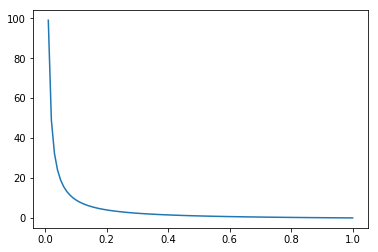

In [5]:
x = np.linspace(.01,1.0,100)
y = [(1.0 - gamma) / gamma for gamma in x]
plt.plot(x,y)

In [6]:
from utils import print_table
print_table(gridmdp_small.to_arrows(pi_gmdps))
U_vi, vi_iter_time, vi_deltas = value_iteration(gridmdp_small)

>   >      >   .
^   None   ^   .
^   >      ^   <


Text(0.5,0,'Iteration number')

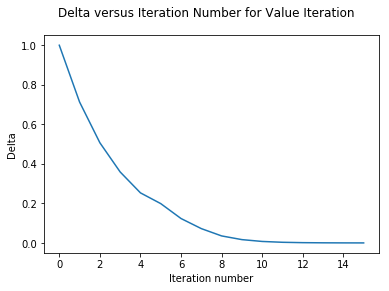

In [7]:
plt.plot(vi_deltas)
plt.suptitle("Delta versus Iteration Number for Value Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")
#vi_deltas_plot.title()

In [ ]:
dist_lg = []

for k in range(1,25):
    k_list = []
    for x in range(10):
        gridmdp = GridMDP(gridlist, terminals=term, gamma=gamma)
        pi, U, pi_iter_time, deltas = policy_iteration(gridmdp, k=k)
        vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
        k_list.append(strat_match_pct(vi_converged, pi, gridmdp.states))
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

[[ 0.50939438  0.64958568  0.79536209  1.        ]
 [ 0.39844322         nan  0.48644002 -1.        ]
 [ 0.29628832  0.253867    0.34475423  0.12987275]]


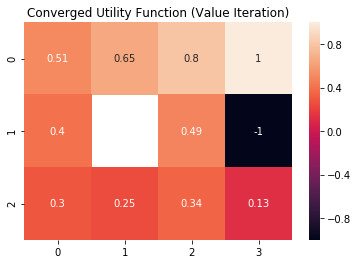

In [8]:
def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return np.flip(utility_array, 0)

vi_utility_array = utility_dict_toarray(U_vi, (3,4))

print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)
vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

[[ 0.5092562   0.64958536  0.7953622   1.        ]
 [ 0.39732507         nan  0.48644019 -1.        ]
 [ 0.29515993  0.25394841  0.34478226  0.12991928]]
>   >      >   .
^   None   ^   .
^   >      ^   <


True

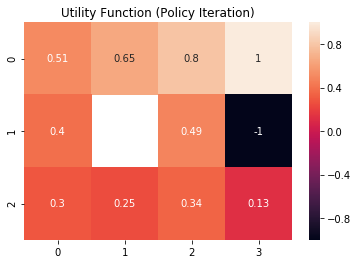

In [64]:
pi, U, pi_iter_time, deltas = policy_iteration(gridmdp_small, k=3)
pi_utility_array = utility_dict_toarray(U, (3,4))

print(pi_utility_array)

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp_small.to_arrows(pi))

gridmdp_small.to_arrows(pi) == gridmdp_small.to_arrows(pi_gmdps)

Text(0.5,0,'Iteration number')

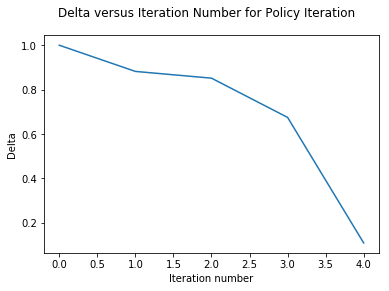

In [65]:
plt.plot(deltas)
plt.suptitle("Delta versus Iteration Number for Policy Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")    


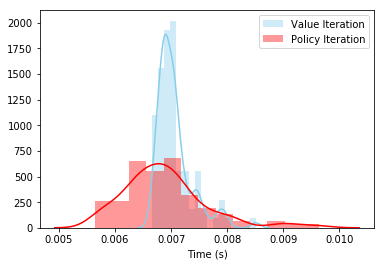

In [33]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.9)
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=11)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

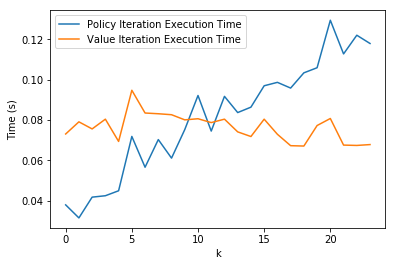

In [12]:
pi_klist = ['mdp.policy_iteration(gridmdp, k={})'.format(x) for x in range(1,25)]
pi_times, vi_times = [], []
for k_pi_call in pi_klist:
    pi_times.append(timeit.timeit(k_pi_call, number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("k")
plt.ylabel("Time (s)")

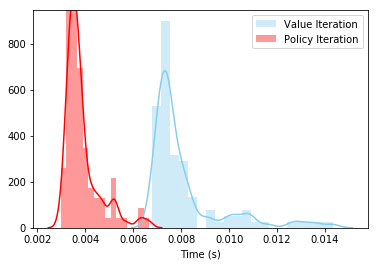

In [34]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.9)
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=3)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

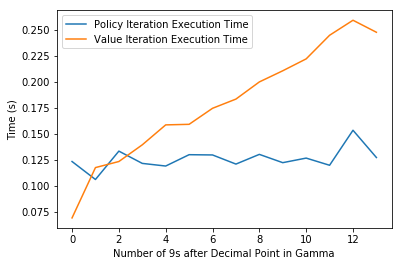

In [14]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = {})
'''

setup_list = [setup.format("0." + x*"9") for x in range(1,15)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=20)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Number of 9s after Decimal Point in Gamma")
plt.ylabel("Time (s)")

Text(0,0.5,'Time (s)')

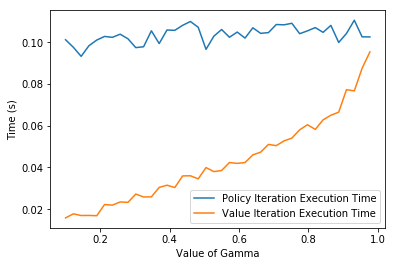

In [15]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = {})
'''

setup_list = [setup.format(x) for x in np.linspace(.1,1,40, endpoint=False)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=20)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(np.linspace(.1,1,40, endpoint=False), pi_times, label='Policy Iteration Execution Time')
plt.plot(np.linspace(.1,1,40, endpoint=False), vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Value of Gamma")
plt.ylabel("Time (s)")

# Large MDP

In [88]:
gridmdp_large = GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])

0.3409090909090909
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.38636363636363635
0.3181818181818182
0.38636363636363635
0.38636363636363635
0.5454545454545454
0.6136363636363636
0.5909090909090909
0.7045454545454546
0.6136363636363636
0.6136363636363636
0.38636363636363635
0.5
0.9772727272727273
1.0
1.0


(0, 1)

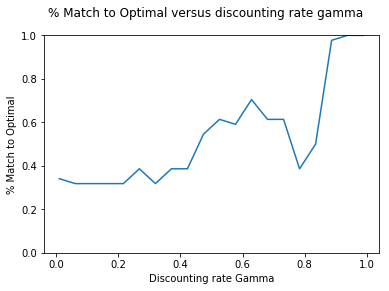

In [37]:
import difflib

gridlist_large = [[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]]

term_large = [(3, 2), (3, 1)]


def strat_match_pct(strat1, strat2, states):
    optimal = [strat1[state] for state in sorted(states)]
    suboptimal = [strat2[state] for state in sorted(states)]
    sm = difflib.SequenceMatcher(None,optimal,suboptimal)
    print(sm.ratio())
    return sm.ratio()

dist_lg = []

for gamma in np.linspace(0.01,0.99,20):
    gridmdp = GridMDP(gridlist_large, terminals=term_large, gamma=gamma)
    vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
    vi_unconverged = best_policy(gridmdp, value_iteration(gridmdp, 1.0)[0])
    dist_lg.append(strat_match_pct(vi_converged, vi_unconverged, gridmdp.states))

plt.plot(np.linspace(0.01,0.99,20), dist_lg)

plt.suptitle("% Match to Optimal versus discounting rate gamma")
plt.ylabel("% Match to Optimal")
plt.xlabel("Discounting rate Gamma")
plt.ylim((0,1))

0.6363636363636364
0.5909090909090909
0.6363636363636364
0.5909090909090909
0.6363636363636364
0.5909090909090909
0.6363636363636364
0.5909090909090909
0.6363636363636364
0.5909090909090909
0.6818181818181818
0.5
0.6818181818181818
0.5
0.6818181818181818
0.5
0.6818181818181818
0.5
0.6818181818181818
0.5
0.8181818181818182
0.5
0.8181818181818182
0.5
0.6818181818181818
0.5
0.6818181818181818
0.5
0.6818181818181818
0.5
0.8181818181818182
0.5
0.8181818181818182
0.5
0.8181818181818182
0.5
0.8181818181818182
0.7272727272727273
0.8181818181818182
0.7272727272727273
0.8181818181818182
0.7272727272727273
0.7954545454545454
0.9090909090909091
0.7954545454545454
0.7272727272727273
0.7954545454545454
0.7272727272727273
0.7954545454545454
0.8863636363636364
0.7954545454545454
0.6363636363636364
0.8181818181818182
0.9090909090909091
0.7954545454545454
0.7272727272727273
0.7954545454545454
0.8863636363636364
0.9318181818181818
0.9090909090909091
0.9318181818181818
0.8863636363636364
0.931818181818181

(0, 1)

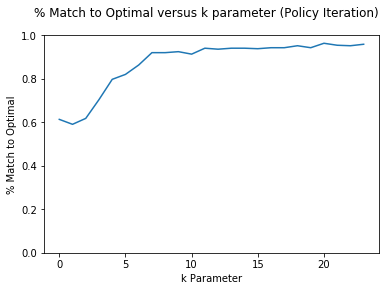

In [104]:
dist_lg = []

for k in range(1,25):
    k_list = []
    for x in range(10):
        gridmdp = GridMDP(gridlist_large, terminals=term_large, gamma=gamma)
        pi, U, pi_iter_time, deltas = policy_iteration(gridmdp, k=k)
        vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
        k_list.append(strat_match_pct(vi_converged, pi, gridmdp.states))
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

In [114]:
dist_lg = []
gridmdp = GridMDP(gridlist_large, terminals=term_large, gamma=gamma)
vi_converged = best_policy(gridmdp, value_iteration(gridmdp, epsilon = 0.0)[0])

"""for ep in np.linspace(0.0,5.0,10):
    k_list = []
    for x in range(10):
        vi_unconverged = value_iteration(gridmdp, epsilon = ep)[0]
        vi_unconverged = best_policy(gridmdp, )
        k_list.append(strat_match_pct(vi_converged, vi_unconverged, gridmdp.states))
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))"""

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


KeyboardInterrupt: 

(0, 1)

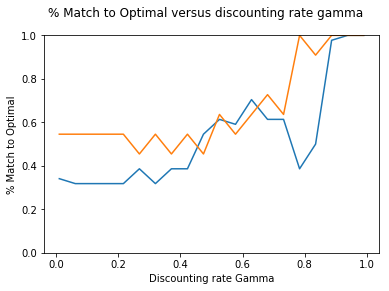

In [18]:
plt.plot(np.linspace(0.01,0.99,20), dist_lg)
plt.plot(np.linspace(0.01,0.99,20), dist_sm)
plt.suptitle("% Match to Optimal versus discounting rate gamma")
plt.ylabel("% Match to Optimal")
plt.xlabel("Discounting rate Gamma")
plt.ylim((0,1))

In [39]:
pi = best_policy(gridmdp, value_iteration(gridmdp_large, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['v', None, 'v', 'v', 'v', None, 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['>', '>', '>', '.', '>', '>', '>', 'v'],
 ['^', None, '>', '.', '^', None, '>', '^'],
 ['>', '>', '>', '>', '>', '>', '^', '^']]

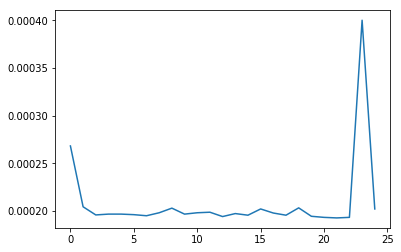

In [40]:
U_vi, vi_iter_time, deltas = value_iteration(gridmdp_large)
plt.plot(vi_iter_time)

[[-5.19966670e-02 -6.85482068e-03  4.77860748e-02  1.04204306e-01
   1.67471329e-01  2.38443346e-01  3.27117200e-01  3.95589455e-01]
 [-2.57703862e-02             nan  9.41061128e-02  1.58352554e-01
   2.30241485e-01             nan  4.30631353e-01  5.14647280e-01]
 [ 2.63154639e-02  8.98312836e-02  1.54718213e-01  2.34953497e-01
   3.26764623e-01  4.31551830e-01  5.35494966e-01  6.52183688e-01]
 [ 4.43420125e-02  1.15139355e-01  1.89862901e-01  2.82595853e-01
   3.92513178e-01  5.23954316e-01  6.63831682e-01  8.12906426e-01]
 [-9.92604045e-03             nan  1.38595411e-01  2.09354763e-01
   2.87307865e-01             nan  7.81605816e-01  1.00000000e+00]
 [-3.82071237e-04  5.63508820e-02  1.19742821e-01  1.89577282e-01
   2.68992452e-01  3.59619173e-01  4.65121894e-01 -1.00000000e+00]]


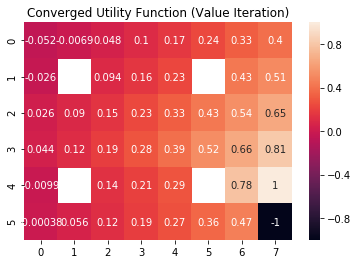

In [83]:
vi_utility_dict, iter_time, d = value_iteration(gridmdp_large)

vi_utility_array = utility_dict_toarray(vi_utility_dict, (6,8))

print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

True
>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


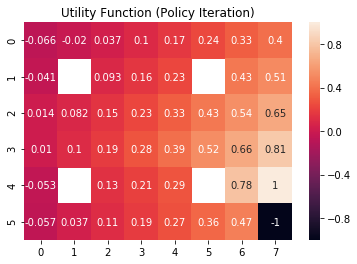

In [84]:
pi, U, pi_iter_time, d = policy_iteration(gridmdp_large, k=1)
pi_utility_array = utility_dict_toarray(U, (6,8))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

pi_gmdpl = best_policy(gridmdp_large, value_iteration(gridmdp_large)[0])

print(pi_gmdpl == pi)

print_table(gridmdp.to_arrows(pi))

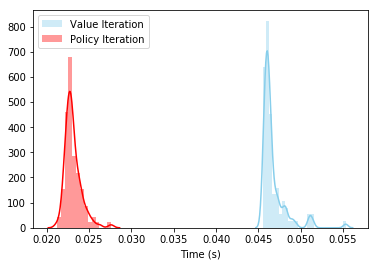

In [85]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=1)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

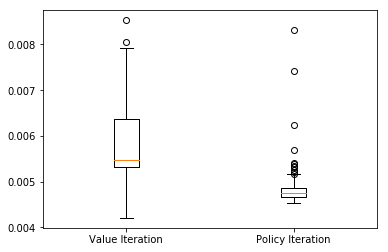

In [73]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

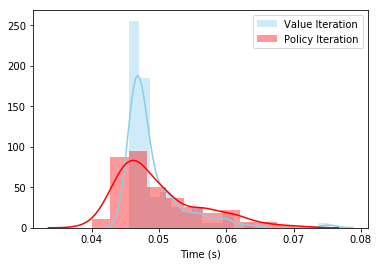

In [91]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=15)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

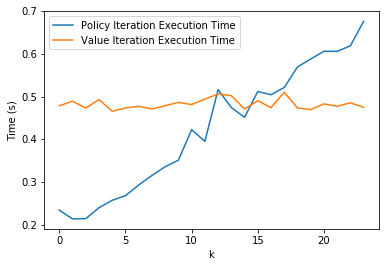

In [93]:
setup = '''
import mdp

gridmdp_large = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''



pi_klist = ['mdp.policy_iteration(gridmdp_large, k={})'.format(x) for x in range(1,25)]
pi_times, vi_times = [], []
for k_pi_call in pi_klist:
    pi_times.append(timeit.timeit(k_pi_call, number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp_large)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("k")
plt.ylabel("Time (s)")

Text(0,0.5,'Time (s)')

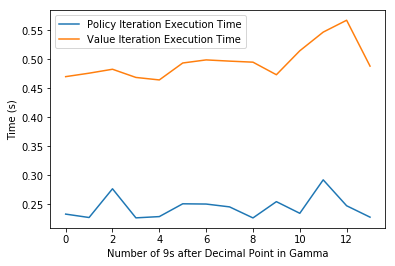

In [96]:
setup_list = [setup.format("0." + x*"9") for x in range(1,15)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp_large, k=1)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp_large)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Number of 9s after Decimal Point in Gamma")
plt.ylabel("Time (s)")

Text(0,0.5,'Time (s)')

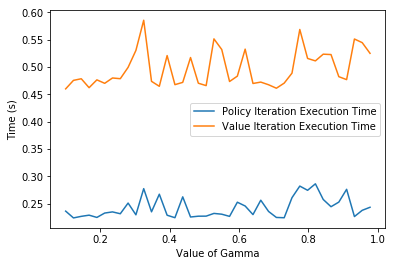

In [97]:
setup_list = [setup.format(x) for x in np.linspace(.1,1,40, endpoint=False)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp_large, k=1)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp_large)', number = 100, setup=setup))

plt.plot(np.linspace(.1,1,40, endpoint=False), pi_times, label='Policy Iteration Execution Time')
plt.plot(np.linspace(.1,1,40, endpoint=False), vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Value of Gamma")
plt.ylabel("Time (s)")